# 1. Import the necessary libraries:

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras import layers

# 2. Load the dataset:

In [4]:
data_dir = 'C:/Users/DELL/Documents/Datasets/Malaria/cell_images'

# Create paths for infected and uninfected images
infected_path = os.path.join(data_dir, 'Parasitized')
uninfected_path = os.path.join(data_dir, 'Uninfected')

# Read the images and create labels
infected_images = [os.path.join(infected_path, img) for img in os.listdir(infected_path)]
uninfected_images = [os.path.join(uninfected_path, img) for img in os.listdir(uninfected_path)]

# Create a dataframe to store image paths and labels
data = pd.DataFrame({'image_path': infected_images + uninfected_images,
                     'label': ['Infected'] * len(infected_images) + ['Uninfected'] * len(uninfected_images)})

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27558 entries, 0 to 27557
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  27558 non-null  object
 1   label       27558 non-null  object
dtypes: object(2)
memory usage: 430.7+ KB


In [5]:
data.head()

,image_path,label
0,C:/Users/DELL/Documents/Datasets/Malaria/cell_...,Infected
1,C:/Users/DELL/Documents/Datasets/Malaria/cell_...,Infected
2,C:/Users/DELL/Documents/Datasets/Malaria/cell_...,Infected
3,C:/Users/DELL/Documents/Datasets/Malaria/cell_...,Infected
4,C:/Users/DELL/Documents/Datasets/Malaria/cell_...,Infected


# Split the dataset into training and testing sets:

In [5]:
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
     data['image_path'], data['label'],
     test_size=0.1, random_state=42
)

# Preprocess the images using an image data generator:

In [6]:
# Create an image data generator with data augmentation
image_generator = ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True   
)

# Load and preprocess training images
train_images = image_generator.flow_from_dataframe(
    dataframe=pd.DataFrame({'image_path': train_data, 'label': train_labels}),
    x_col='image_path', y_col='label',
    target_size=(64, 64), batch_size=32, class_mode='binary'
)

# Load and preprocess testing images
test_images = image_generator.flow_from_dataframe(
    dataframe=pd.DataFrame({'image_path': test_data, 'label': test_labels}),
    x_col='image_path', y_col='label',
    target_size=(64, 64), batch_size=32, class_mode='binary'
)


Found 24802 validated image filenames belonging to 2 classes.
Found 2756 validated image filenames belonging to 2 classes.


# Build the CNN model:

In [7]:
# Create a sequential model
model = Sequential()

# Add convolutional and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Add fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



# Train the model:

In [9]:
# Set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(
    train_images, epochs=20, 
    validation_data=test_images, 
    callbacks=[early_stopping]
)

Epoch 1/20
776/776 [==============================] - 659s 846ms/step - loss: 0.3156 - accuracy: 0.8640 - val_loss: 0.1701 - val_accuracy: 0.9478
Epoch 2/20
776/776 [==============================] - 188s 243ms/step - loss: 0.1746 - accuracy: 0.9471 - val_loss: 0.1451 - val_accuracy: 0.9517
Epoch 3/20
776/776 [==============================] - 190s 245ms/step - loss: 0.1538 - accuracy: 0.9515 - val_loss: 0.1561 - val_accuracy: 0.9463
Epoch 4/20
776/776 [==============================] - 190s 245ms/step - loss: 0.1465 - accuracy: 0.9539 - val_loss: 0.1518 - val_accuracy: 0.9499
Epoch 5/20
776/776 [==============================] - 189s 244ms/step - loss: 0.1408 - accuracy: 0.9546 - val_loss: 0.1288 - val_accuracy: 0.9565
Epoch 6/20
776/776 [==============================] - 251s 324ms/step - loss: 0.1403 - accuracy: 0.9546 - val_loss: 0.1298 - val_accuracy: 0.9543
Epoch 7/20
776/776 [==============================] - 123s 158ms/step - loss: 0.1357 - accuracy: 0.9550 - val_loss: 0.1273 -

# Evaluate the Accuracy

In [11]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_images)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

87/87 [==============================] - 6s 66ms/step - loss: 0.1277 - accuracy: 0.9572
Test Loss: 0.12771500647068024
Test Accuracy: 0.9571843147277832


In [14]:
model.save('Documents/Datasets/Malaria/cell_images/malaria_model1.h5')

# Plot the model accuracy

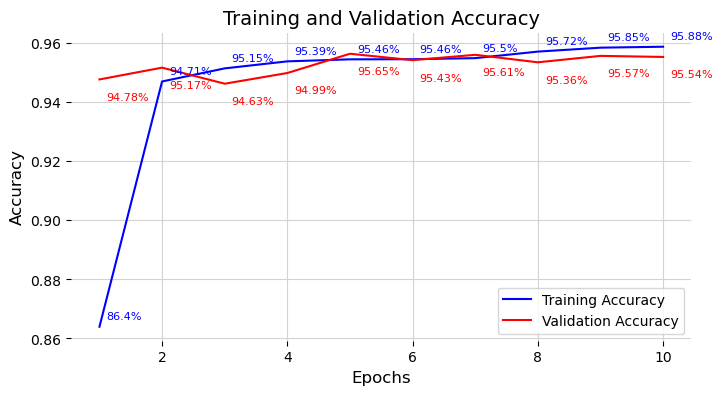

In [32]:
# Extract accuracy values from the training history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Number of epochs
epochs = range(1, len(training_accuracy) + 1)

# Create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the trend line for training accuracy
ax.plot(epochs, training_accuracy, 'b', label='Training Accuracy')

# Plot the trend line for validation accuracy
ax.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')

# Set plot title, x-axis label, and y-axis label
ax.set_title('Training and Validation Accuracy', fontsize=14)
ax.set_xlabel('Epochs', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)

# Remove the frame of the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add gridlines
ax.grid(color='lightgray', linestyle='-')

# Customize tick labels
ax.tick_params(axis='both', which='major', labelsize=10)

# Add labels to the data points
for i, acc in enumerate(training_accuracy):
    ax.annotate(
        f'{round(acc*100, 2)}%', xy=(i+1, acc), xytext=(5, 5),
        textcoords='offset points', fontsize=8, color='b'
    )
    
for i, acc in enumerate(validation_accuracy):
    ax.annotate(
        f'{round(acc*100, 2)}%', xy=(i+1, acc), xytext=(5, -15), 
        textcoords='offset points', fontsize=8, color='r')

# Add a legend to the plot
ax.legend(fontsize=10)

# Save the plot as an image
plt.savefig('Tr&V accuracy.png', dpi=300)

# Display the plot
plt.show()


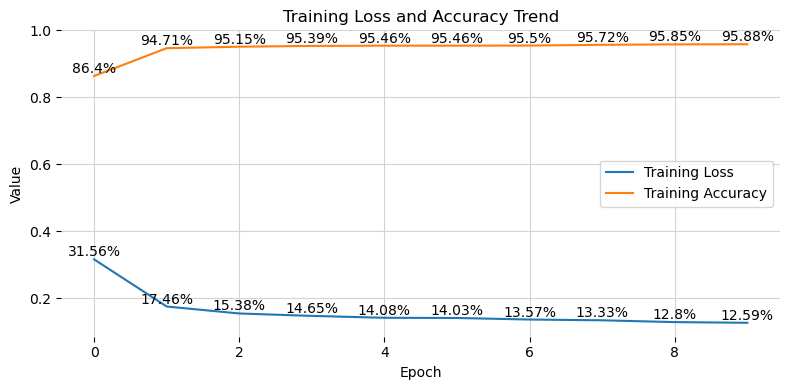

In [31]:
import matplotlib.pyplot as plt

# Extract the loss and accuracy values from the history
loss = history.history['loss']
accuracy = history.history['accuracy']

# Create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 4))

# Remove the frame of the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add gridlines
ax.grid(color='lightgray', linestyle='-')

# Plot the loss trend
ax.plot(loss, label='Training Loss')
ax.plot(accuracy, label='Training Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Value')
ax.set_title('Training Loss and Accuracy Trend')
ax.legend()

# Add labels to the data points
for i, j in enumerate(loss):
    ax.annotate(str(round(j * 100, 2)) + '%', xy=(i, j), ha='center', va='bottom')
for i, j in enumerate(accuracy):
    ax.annotate(str(round(j * 100, 2)) + '%', xy=(i, j), ha='center', va='bottom')
    
# Save the plot as an image
plt.savefig('Malaria Model.png')

# Display the plot
plt.tight_layout()
plt.show()
